**Mathematical Transformation :**


*   Log Transform : har value ka log leleo , but hum log negative values pe nahi le sakte hai , generally kab kab lete hai log transform use kar sakte hai , jab right skewed data ho , log karne se generally kya hota hai bahoot baddi values chooti ho jatti hai , log kya karta hai hummare additive state ko multiplicative state me change kar deta hai

nplog(), nplog1() me kya difrrence ki , nplog me 0 nahi a sakta , but nplog1 me hummesa 1 add ho hoke log niklega isliye kabhi zero wala issue nahi ayega


*   Reciprocal 1/x issme kya hota hai hummari sarri badi values chooti ho jati hai hai , aur hummari sarri values jo chooti thi woh badi ho jatti hai


*   Power(Square / Sqrt) x^2 Lefy skewed data

, x^(1/2) iska jyadda use nahi hota

*   Box-Cox

jo Transformation karne ke bad value milenge unki range [-5,5] , only aplly to value where value is gretaer than zero

[link text](https://drive.google.com/drive/folders/1xoocNSPmO8g9IGNiJ8qgar4I1RsFKqEV?usp=sharing)

isme standartization automatically ho jatti hai

useful for modelling related to hetersedasity(non -constant-variance)


*   Yeo - johnsons Transformation , Upar jo transformation possible thi woh sirf greater than 0 pe possible thi , yaha -ve no ke liye bhi possible hai

*   Custom transformation , : we cam make our own  transformation according to our needs

in sab transformation ka ek benefir hai ki hummara data ka distribution Normal Distribution ho jata hai , jisse hummari calculation asan ho jati hai

**Sklearn me 3 type ke transformer hai**

1: Function Transformer : Log , Reciprocal, Sq/ sqrt , own custom

2: Power transformer : Box-cox , yeo johnsons

3: Quantile Transformer : not much used

**How to find is Data is normal or not ?**

dist plot

pandas Skew Function if value == 0

QQ plot

X is theoritical quantiles

y is data sample quantiles

jitna aap drawn line ke upar ho utna aap normal ke klarib ho

In [59]:
import pandas as pd
import numpy as np
import scipy.stats as stats    # for QQ plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [60]:
df = pd.read_csv('/content/drive/MyDrive/Data set for Data science/titanic/train.csv',usecols=['Age','Fare','Survived'])

In [61]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [62]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [63]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [64]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [65]:
x= df.iloc[:,1:3]
y= df.iloc[:,0]

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<ipython-input-67-f5b557e370fb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],ax=ax1)


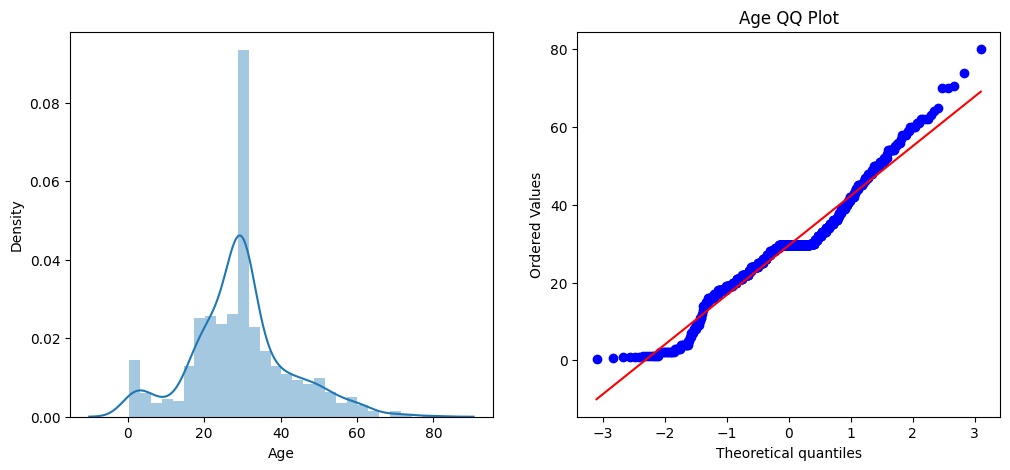

In [67]:
fig,(ax1 , ax2)= plt.subplots(ncols=2,figsize=(12,5))
sns.distplot(x_train['Age'],ax=ax1)
plt.title('Age Pdf')
stats.probplot(x_train['Age'],dist='norm',plot=ax2)
plt.title('Age QQ Plot')
plt.show()

<ipython-input-68-37ecef5770b7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'],ax=ax1)


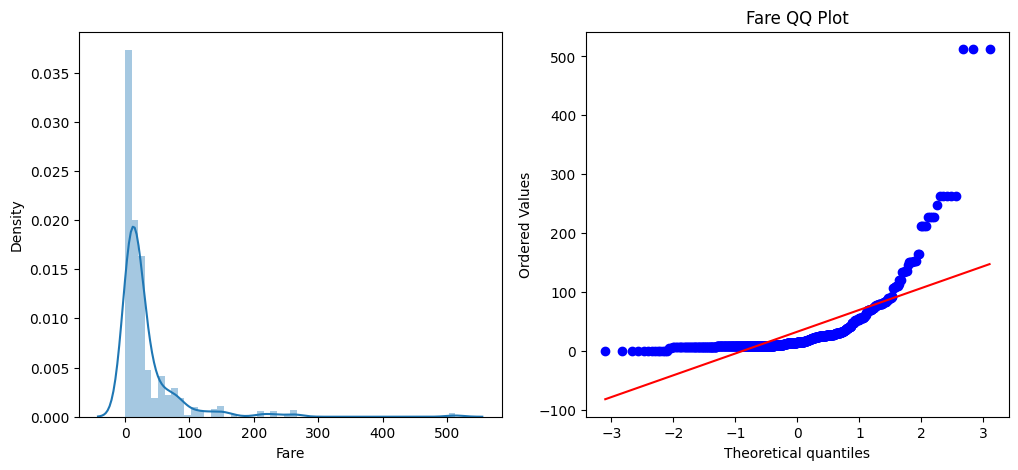

In [68]:
fig,(ax1 , ax2)= plt.subplots(ncols=2,figsize=(12,5))
sns.distplot(x_train['Fare'],ax=ax1)
plt.title('Fare Pdf')
stats.probplot(x_train['Fare'],dist='norm',plot=ax2)
plt.title('Fare QQ Plot')
plt.show()

In [69]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy lr",accuracy_score(y_test,y_pred))

Accuracy lr 0.6480446927374302


In [70]:
DTree = DecisionTreeClassifier()
DTree.fit(x_train,y_train)
y_pred = DTree.predict(x_test)
print("Accuracy Dt",accuracy_score(y_test,y_pred))

Accuracy Dt 0.6759776536312849


Now Applying Log Transformer

In [71]:
trf = FunctionTransformer(func=np.log1p)
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

In [72]:
lr = LogisticRegression()
lr.fit(x_train_transformed,y_train)
y_pred = lr.predict(x_test_transformed)
print("Accuracy lr",accuracy_score(y_test,y_pred))

Accuracy lr 0.6815642458100558


In [73]:
DTree = DecisionTreeClassifier()
DTree.fit(x_train_transformed,y_train)
y_pred = DTree.predict(x_test_transformed)
print("Accuracy Dt",accuracy_score(y_test,y_pred))

Accuracy Dt 0.664804469273743


yaha humne dekha Linear regression me accuracy badi , but decison tree pe itni nahi  adi kyuki , kuch algorithm hote hai jinko farq nahi padta , aapke dta ka distribution kya hai

hum kya kar rahe hote hai ki ek bar train test split karte hai , but uuse perfect result nikalne ka assurance nahi milta hai , croos value bahoot bar train tets split karte ho , aur ek bar se jyadd ake result ka mean milta hai

In [74]:
x_transformed = trf.fit_transform(x)
lr = LogisticRegression()
DTree = DecisionTreeClassifier()

print("Lr",np.mean(cross_val_score(lr,x_transformed,y,scoring='accuracy',cv=10)))
print("Lr",np.mean(cross_val_score(DTree,x_transformed,y,scoring='accuracy',cv=10)))

Lr 0.678027465667915
Lr 0.6610861423220975


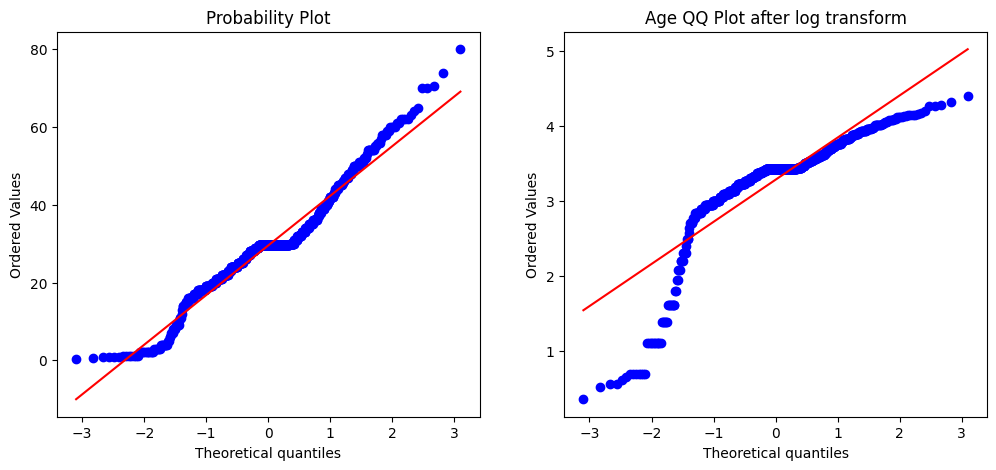

In [75]:
fig,(ax1 , ax2)= plt.subplots(ncols=2,figsize=(12,5))
stats.probplot(x_train['Age'],dist='norm',plot=ax1)
plt.title('Age QQ plot')
stats.probplot(x_train_transformed['Age'],dist='norm',plot=ax2)
plt.title('Age QQ Plot after log transform')
plt.show()

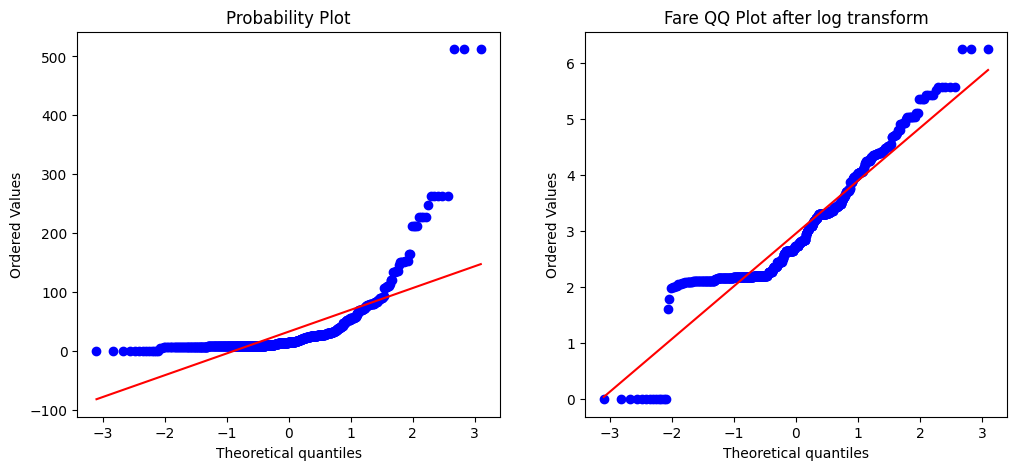

In [76]:
fig,(ax1 , ax2)= plt.subplots(ncols=2,figsize=(12,5))
stats.probplot(x_train['Fare'],dist='norm',plot=ax1)
plt.title('Fare QQ plot')
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=ax2)
plt.title('Fare QQ Plot after log transform')
plt.show()

**BOX - COX Transformation**

In [77]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [78]:
df = pd.read_csv('/content/drive/MyDrive/Data set for Data science/concrete_data.csv')

In [79]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [80]:
df.shape

(1030, 9)

In [81]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [82]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [83]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy lr",r2_score(y_test,y_pred))

Accuracy lr 0.627553179231485


In [92]:
print("Lr",np.mean(cross_val_score(lr,x,y,scoring='r2',cv=10)))

Lr 0.27820729160873814


<ipython-input-93-556679afcaeb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)


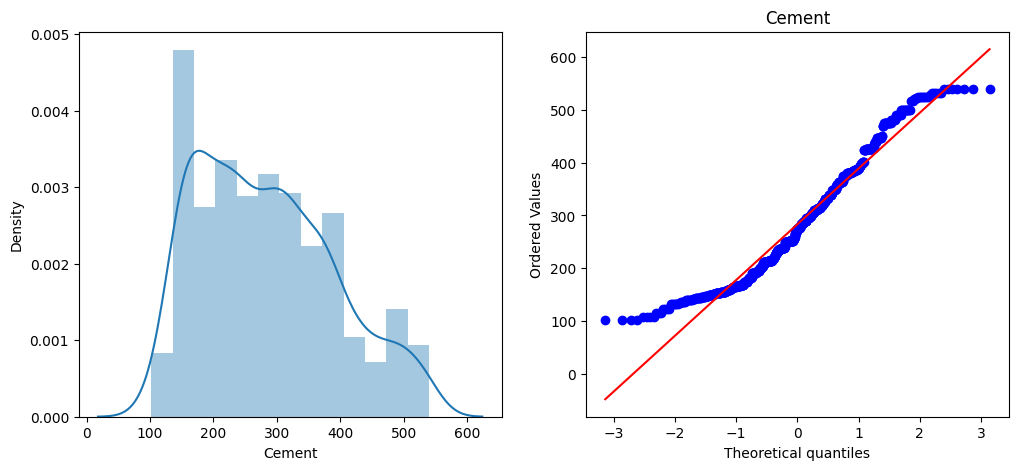

<ipython-input-93-556679afcaeb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)


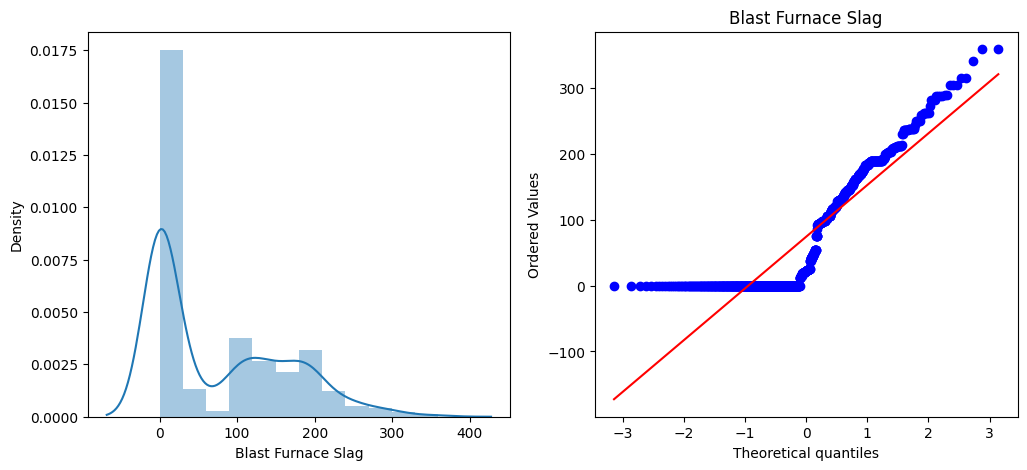

<ipython-input-93-556679afcaeb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)


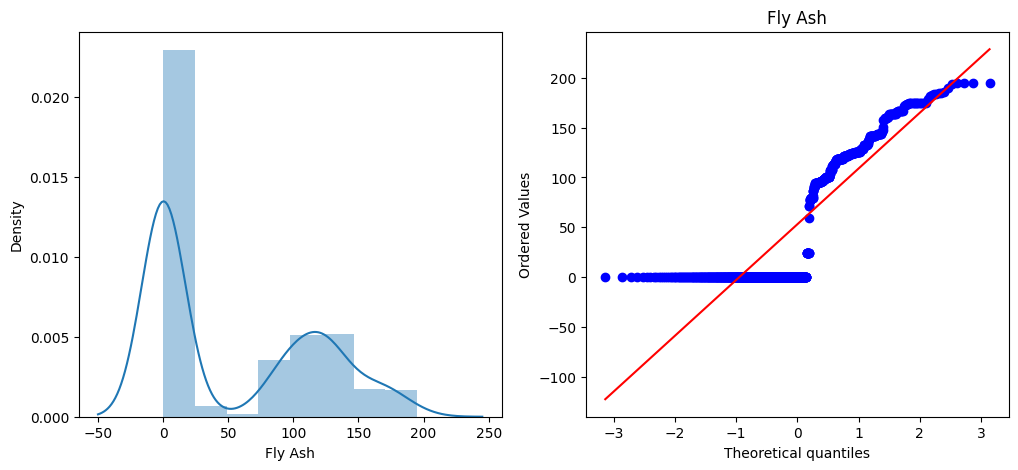

<ipython-input-93-556679afcaeb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)


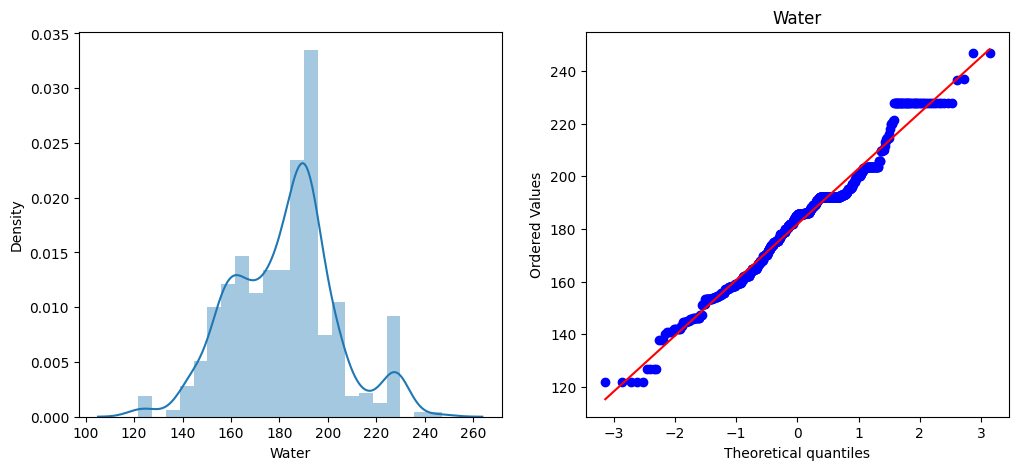

<ipython-input-93-556679afcaeb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)


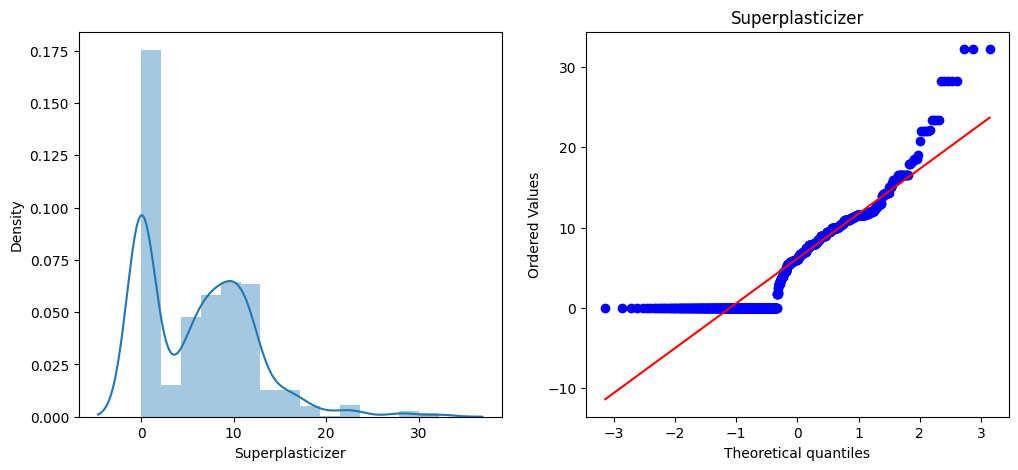

<ipython-input-93-556679afcaeb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)


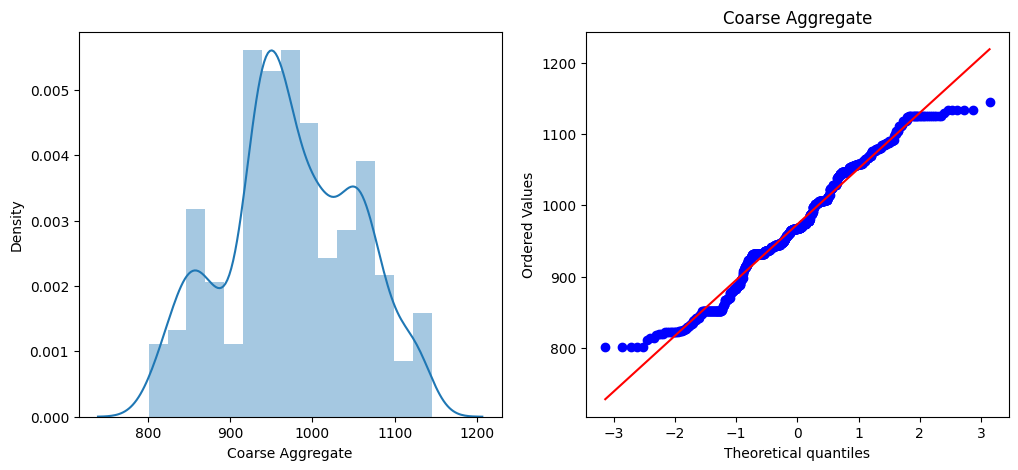

<ipython-input-93-556679afcaeb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)


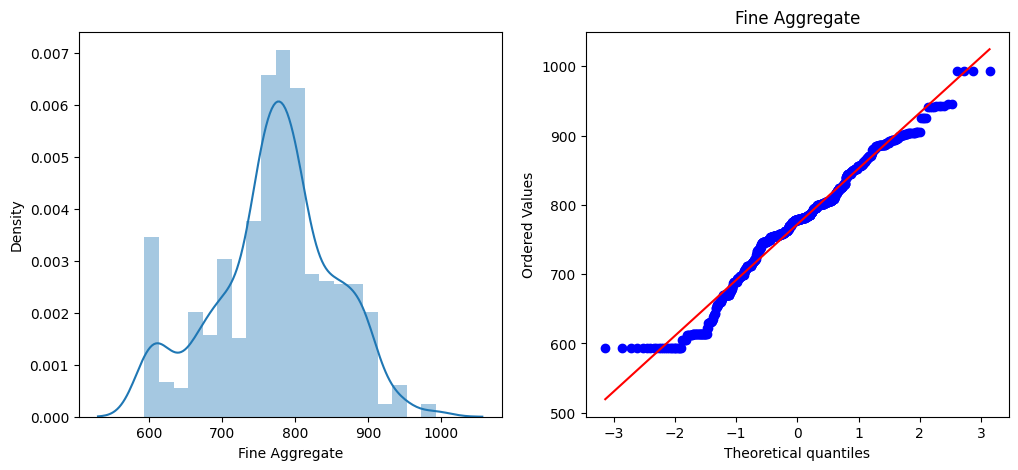

<ipython-input-93-556679afcaeb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)


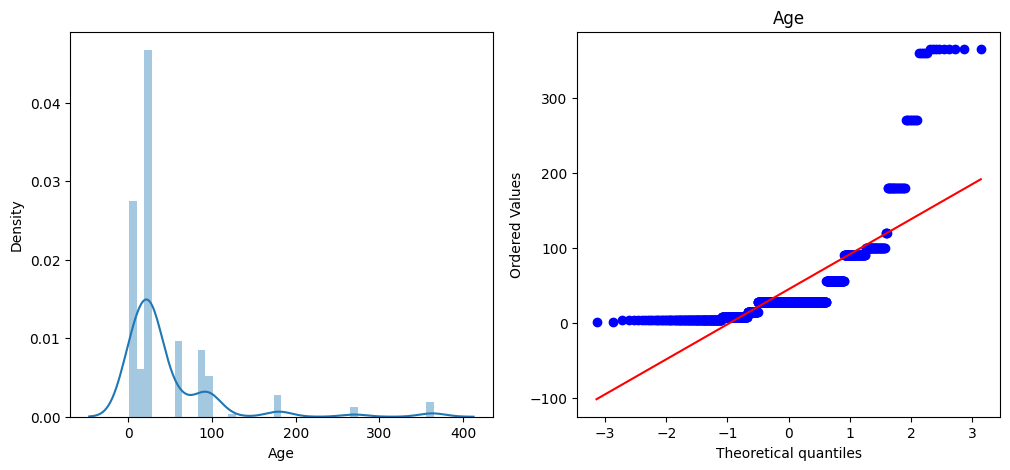

In [93]:

for col in x_train.columns:
  fig,(ax1 , ax2)= plt.subplots(ncols=2,figsize=(12,5))
  sns.distplot(x_train[col],ax=ax1)
  plt.title(col)
  stats.probplot(x_train[col],dist='norm',plot=ax2)
  plt.title(col)
  plt.show()

In [94]:
pt = PowerTransformer(method='box-cox')
x_train_transformed = pt.fit_transform(x_train+0.000001)
x_test_transformed = pt.fit_transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


ye jo lambda calcualte hogaye hai , uska use hoga aur har column me us lamda ki power har value raise ho jayegi

In [95]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred2 = lr.predict(x_test_transformed)
print("Accuracy lr",r2_score(y_test,y_pred2))

Accuracy lr 0.805532100530519


In [97]:
x_transformed = pt.fit_transform(x+0.000001)
print("Lr",np.mean(cross_val_score(lr,x_transformed,y,scoring='r2',cv=10)))

Lr 0.646676475088429


In [104]:
columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']
x_train_transformed = pd.DataFrame(x_train_transformed, columns = columns)

<ipython-input-108-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-108-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


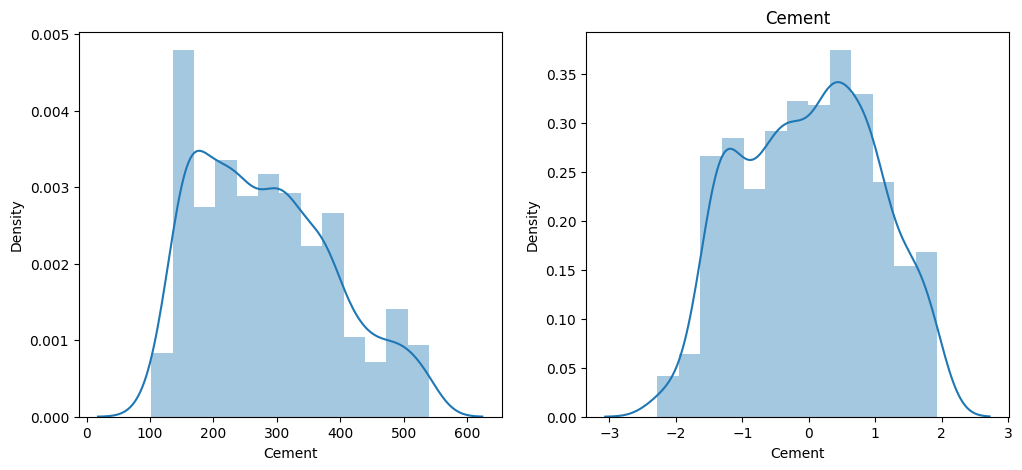

<ipython-input-108-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-108-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


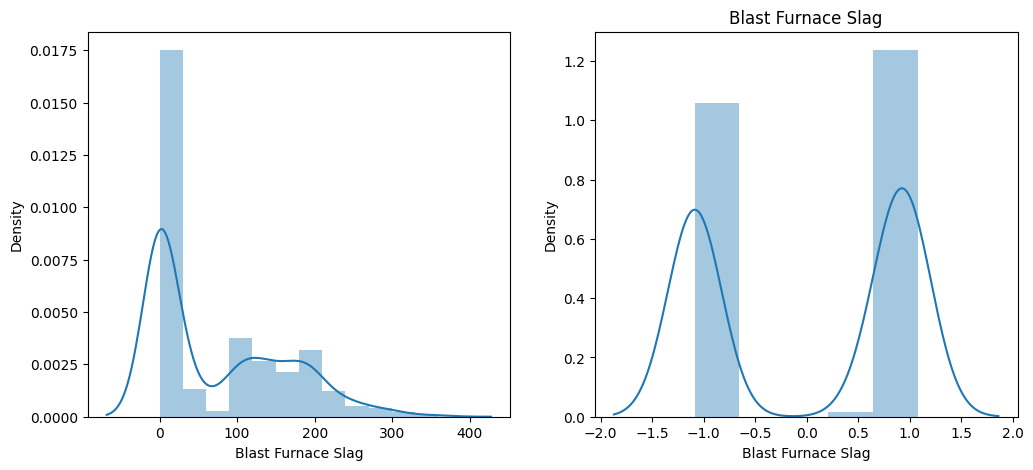

<ipython-input-108-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-108-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


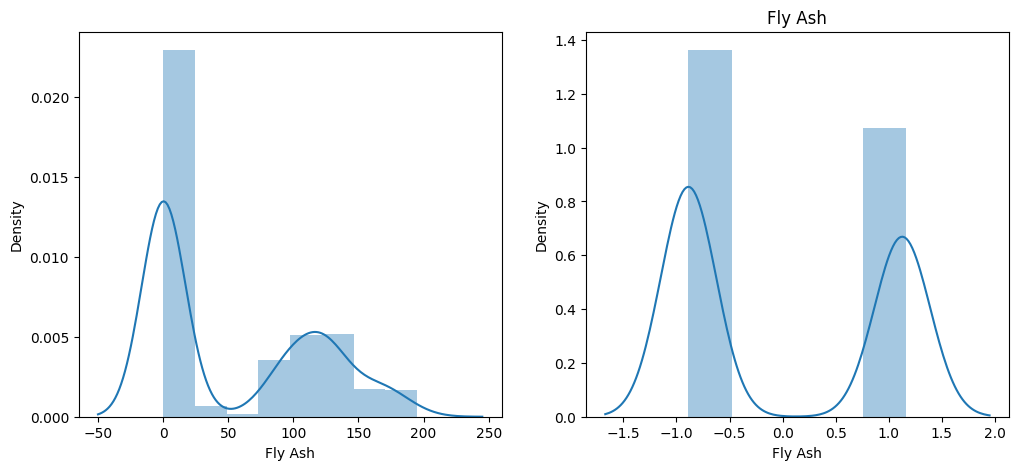

<ipython-input-108-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-108-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


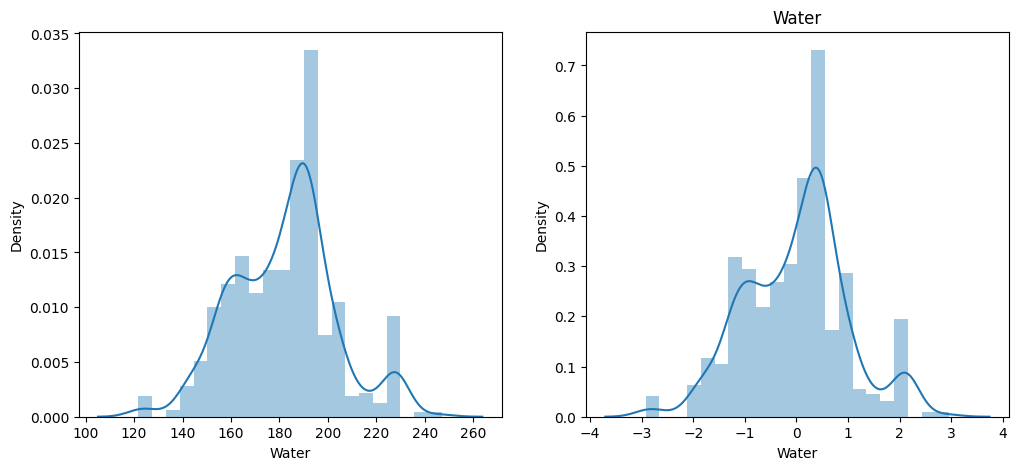

<ipython-input-108-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-108-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


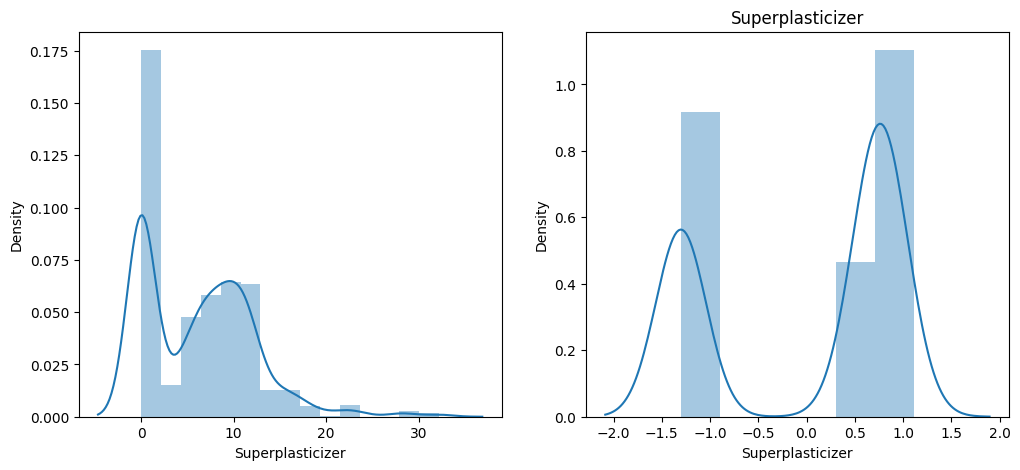

<ipython-input-108-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-108-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


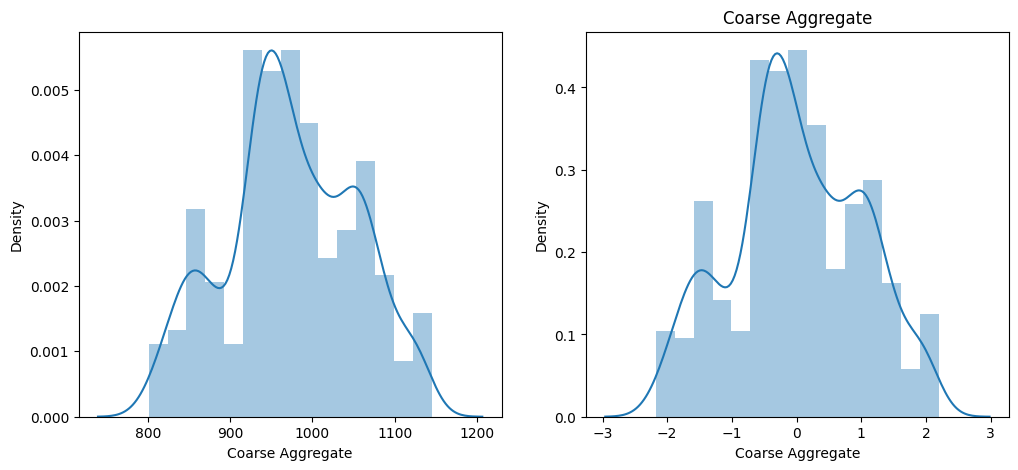

<ipython-input-108-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-108-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


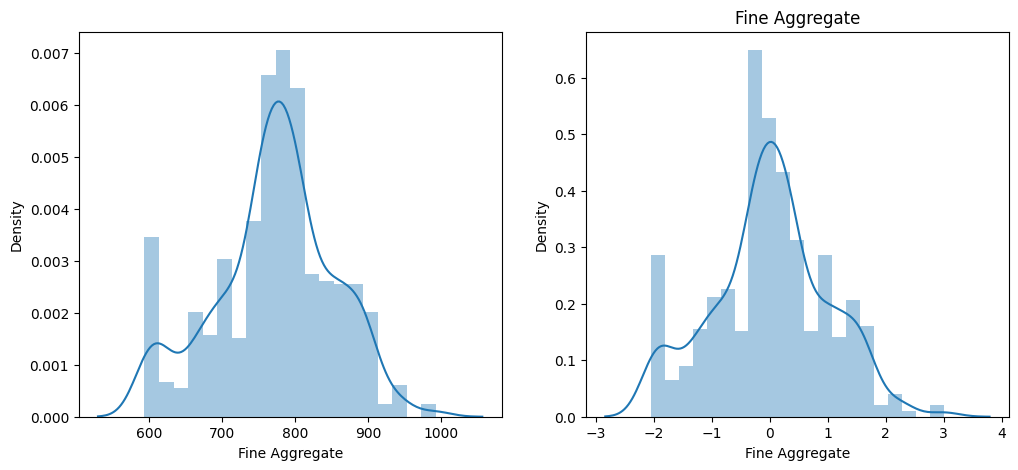

<ipython-input-108-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-108-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


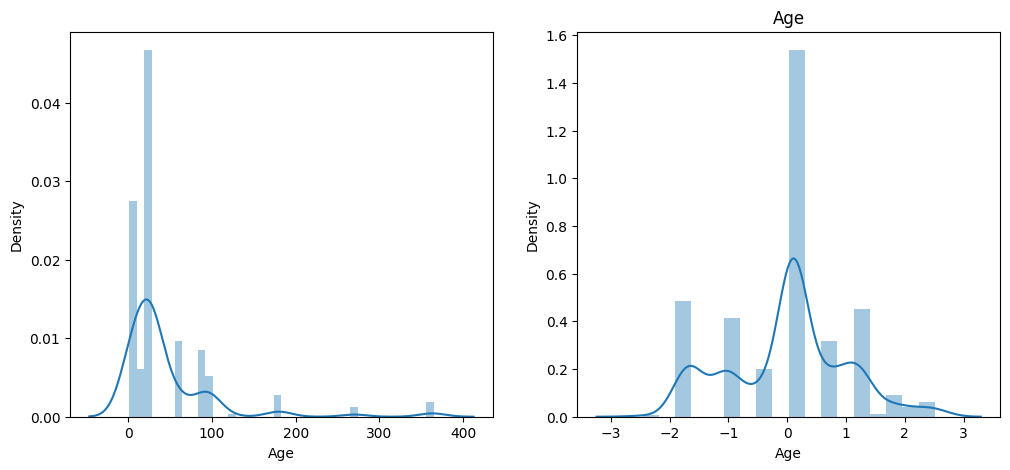

In [108]:
for col in x_train_transformed.columns:
  fig,(ax1 , ax2)= plt.subplots(ncols=2,figsize=(12,5))
  sns.distplot(x_train[col],ax=ax1)
  plt.title(col)
  sns.distplot(x_train_transformed[col],ax=ax2)
  plt.title(col)
  plt.show()

**Apply Yeo-Johnsons transform**

In [115]:
pt1 = PowerTransformer()  # iska default method yeo-johnsons hota hai
x_train_transformed = pt1.fit_transform(x_train+0.000001)
x_test_transformed = pt1.fit_transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns,'Yeo_johnson_lamdas':pt1.lambdas_})

,cols,Yeo_johnson_lamdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [110]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred2 = lr.predict(x_test_transformed)
print("Accuracy lr",r2_score(y_test,y_pred2))

Accuracy lr 0.8153845538583409


improved

In [112]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns = x_train.columns)

<ipython-input-113-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-113-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


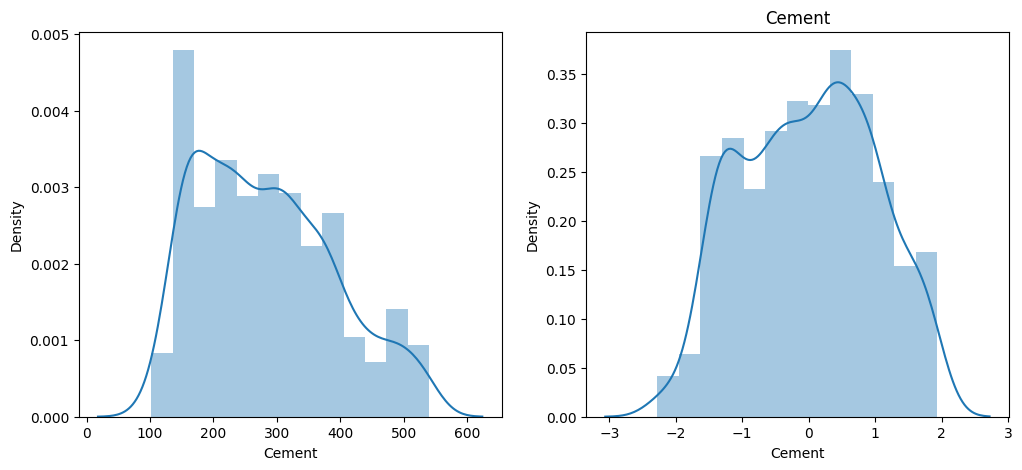

<ipython-input-113-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-113-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


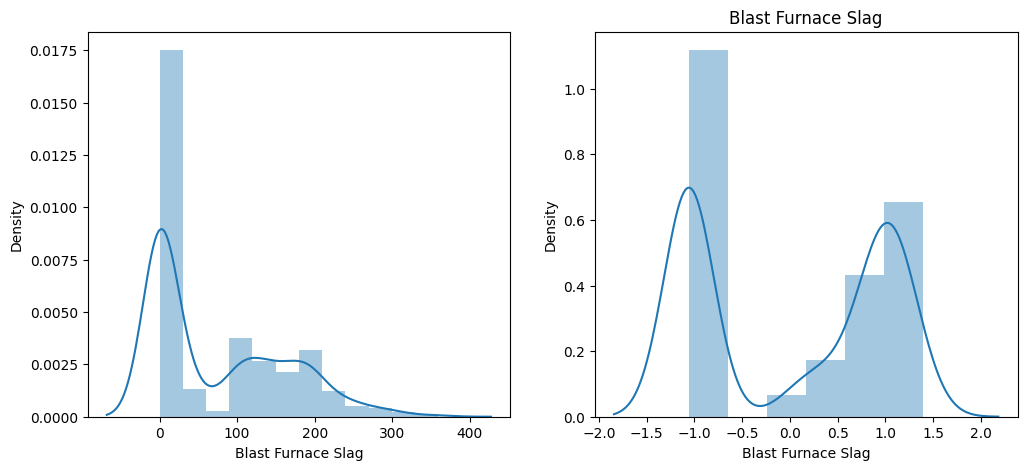

<ipython-input-113-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-113-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


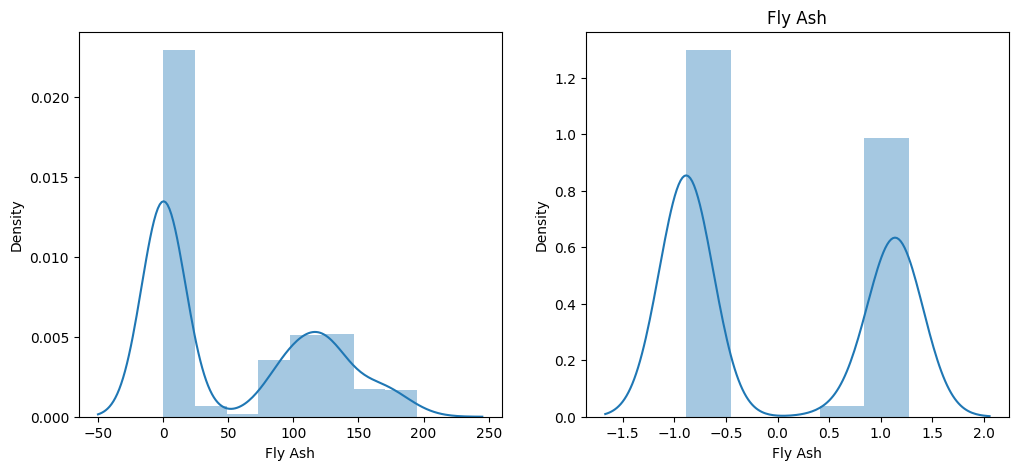

<ipython-input-113-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-113-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


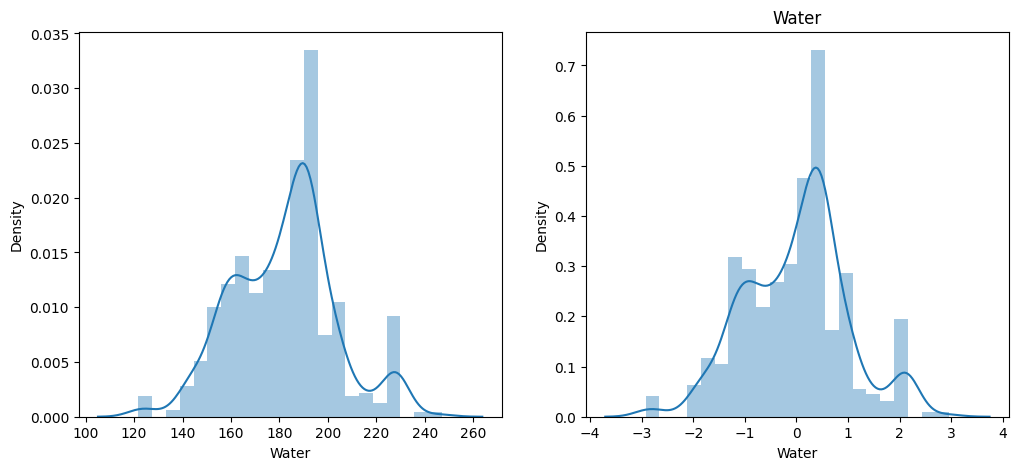

<ipython-input-113-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-113-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


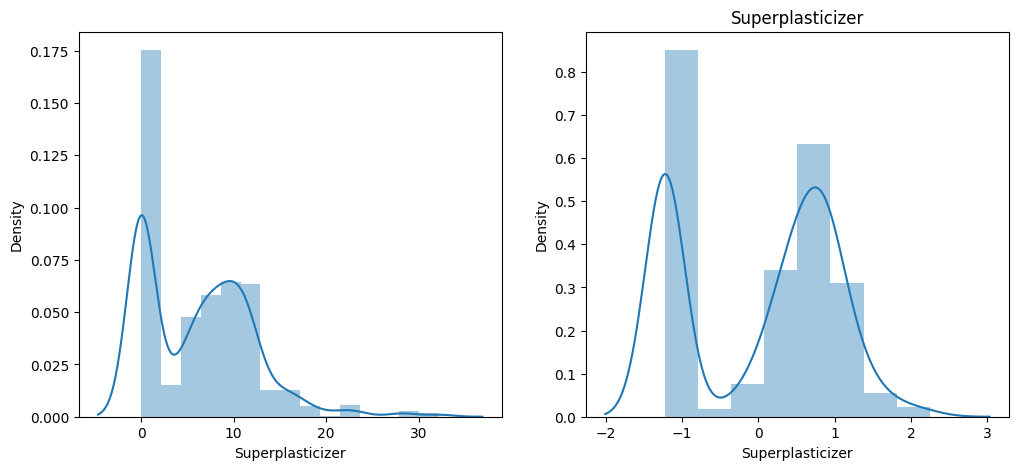

<ipython-input-113-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-113-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


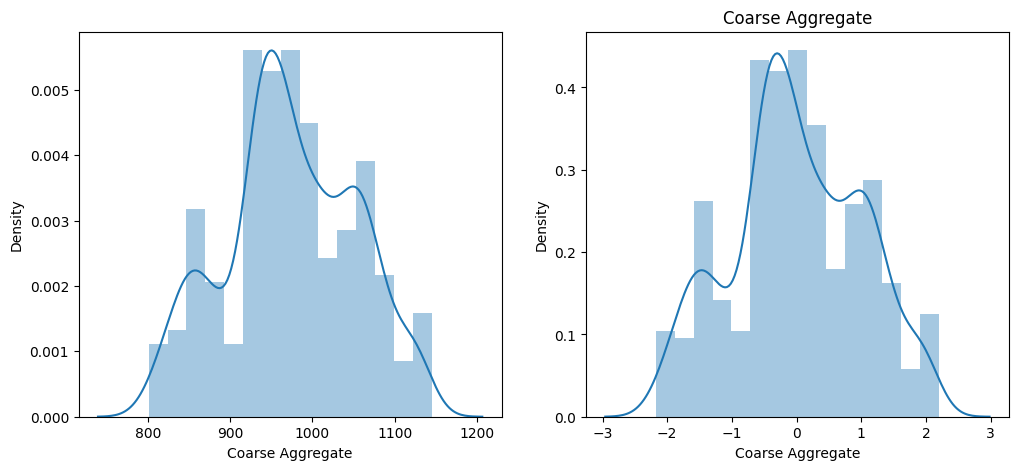

<ipython-input-113-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-113-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


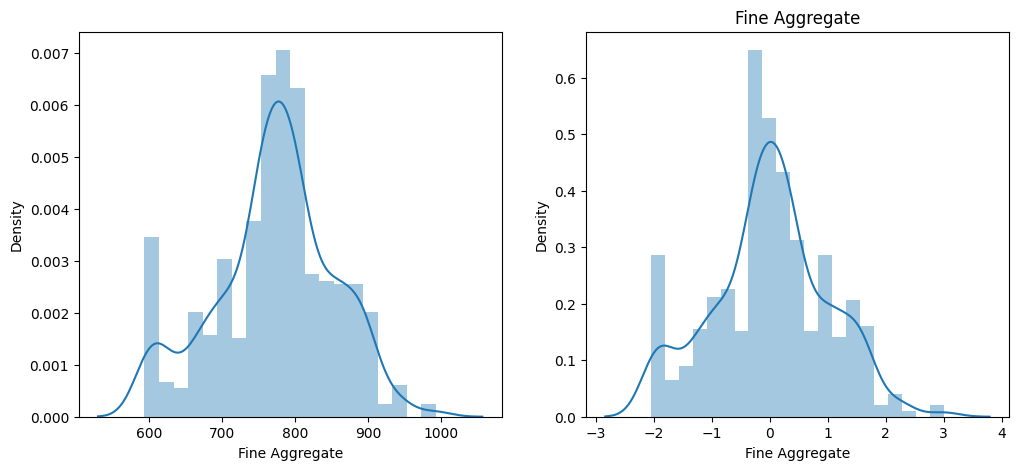

<ipython-input-113-69ba311e2414>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col],ax=ax1)
<ipython-input-113-69ba311e2414>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col],ax=ax2)


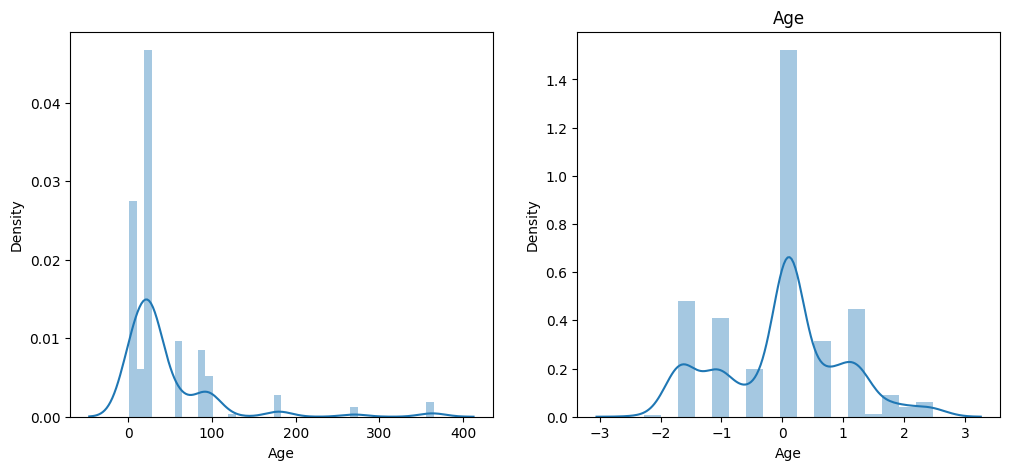

In [113]:
for col in x_train_transformed.columns:
  fig,(ax1 , ax2)= plt.subplots(ncols=2,figsize=(12,5))
  sns.distplot(x_train[col],ax=ax1)
  plt.title(col)
  sns.distplot(x_train_transformed[col],ax=ax2)
  plt.title(col)
  plt.show()

we can see here yeo -johnson work better here

In [117]:
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.213025,0.213025
1,Blast Furnace Slag,0.020476,0.020476
2,Fly Ash,-0.038218,-0.038218
3,Water,0.958936,0.958936
4,Superplasticizer,0.304951,0.304951
5,Coarse Aggregate,1.192751,1.192751
6,Fine Aggregate,1.975085,1.975085
7,Age,-0.062443,-0.062443
